<a href="https://colab.research.google.com/github/somynt/Semester_4/blob/main/2306YOLO9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Unzip the dataset file and store it in a folder called images.
#!unzip "/content/drive/MyDrive/RM_Segmentation_Assignment_dataset.zip" -d "/content/drive/MyDrive/coco2017/"

1

In [ ]:
# Cell 1: Install Ultralytics Library
!pip install ultralytics -q
print("Ultralytics library installed.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 127.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 95.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 42.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 101.5 MB/s eta 0:00:00
Ultralytics library installed.


2

In [ ]:
# Cell 2: Import Libraries and Define Paths
import os
from ultralytics import YOLO
import torch

# Define paths to your dataset in Google Drive
DRIVE_PATH = "/content/drive/MyDrive/coco2017" # Confirmed this is the correct base path

# These are your ORIGINAL COCO JSON annotation files
# --- THESE ARE THE CRUCIAL LINES FOR YOUR labels.json ---
YOUR_CUSTOM_TRAIN_ANNOTATION_FILE = os.path.join(DRIVE_PATH, "train-300", "labels.json")
YOUR_CUSTOM_VAL_ANNOTATION_FILE = os.path.join(DRIVE_PATH, "validation-300", "labels.json")
# Test annotation file - assuming it would also be 'labels.json' directly in test-30 if it exists
YOUR_CUSTOM_TEST_ANNOTATION_FILE = os.path.join(DRIVE_PATH, "test-30", "labels.json")


# Define where your images are located (these paths are correct)
YOUR_CUSTOM_TRAIN_IMAGES_DIR = os.path.join(DRIVE_PATH, "train-300", "data")
YOUR_CUSTOM_VAL_IMAGES_DIR = os.path.join(DRIVE_PATH, "validation-300", "data")
YOUR_CUSTOM_TEST_IMAGES_DIR = os.path.join(DRIVE_PATH, "test-30", "data")


# --- IMPORTANT CHANGE: Define where to save the CONVERTED YOLO format labels ---
# We are now placing them DIRECTLY in the image directories
YOLO_TRAIN_LABELS_DIR = YOUR_CUSTOM_TRAIN_IMAGES_DIR # Labels go alongside training images
YOLO_VAL_LABELS_DIR = YOUR_CUSTOM_VAL_IMAGES_DIR     # Labels go alongside validation images
# For test, if you had labels, they would go here too
YOLO_TEST_LABELS_DIR = YOUR_CUSTOM_TEST_IMAGES_DIR


# Define where you want to save the Ultralytics runs (inside your Drive for persistence)
YOLO_RUNS_DIR = os.path.join(DRIVE_PATH, "yolov9_runs")

# Create necessary directories
# Note: YOLO_LABELS_DIR (the parent 'yolo_labels' folder) is no longer explicitly needed
# because labels are co-located with images.
# However, we still need to ensure the image directories themselves exist, which they should.
# And YOLO_RUNS_DIR for model outputs.
try:
    # No need to create YOLO_TRAIN_LABELS_DIR, etc. as they are image dirs which should exist.
    os.makedirs(YOLO_RUNS_DIR, exist_ok=True)
    print("All necessary directories created successfully within Google Drive.")
except OSError as e:
    print(f"Error creating directories: {e}")
    print("This usually means Google Drive is not mounted correctly or the path is incorrect.")

# --- Verifying Original COCO JSONs (These checks should NOW pass!) ---
print("\n--- Verifying Original COCO JSONs ---")
if os.path.exists(YOUR_CUSTOM_TRAIN_ANNOTATION_FILE):
    print(f"✅ Train COCO JSON found: {YOUR_CUSTOM_TRAIN_ANNOTATION_FILE}")
else:
    print(f"❌ Train COCO JSON NOT found: {YOUR_CUSTOM_TRAIN_ANNOTATION_FILE}")
    print("Please verify this path in your Google Drive.")

if os.path.exists(YOUR_CUSTOM_VAL_ANNOTATION_FILE):
    print(f"✅ Val COCO JSON found: {YOUR_CUSTOM_VAL_ANNOTATION_FILE}")
else:
    print(f"❌ Val COCO JSON NOT found: {YOUR_CUSTOM_VAL_ANNOTATION_FILE}")
    print("Please verify this path in your Google Drive.")
print("------------------------------------\n")


print(f"Original COCO JSON annotations: Train: {YOUR_CUSTOM_TRAIN_ANNOTATION_FILE}, Val: {YOUR_CUSTOM_VAL_ANNOTATION_FILE}")
print(f"Image directories: Train: {YOUR_CUSTOM_TRAIN_IMAGES_DIR}, Val: {YOUR_CUSTOM_VAL_IMAGES_DIR}, Test: {YOUR_CUSTOM_TEST_IMAGES_DIR}")
print(f"Converted YOLO labels will be saved to: Train: {YOLO_TRAIN_LABELS_DIR}, Val: {YOLO_VAL_LABELS_DIR}, Test: {YOLO_TEST_LABELS_DIR}")
print(f"YOLO runs will be saved to: {YOLO_RUNS_DIR}")

# Check for GPU availability
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device: {device}")

# Define your target classes (matching the order in your re-indexed COCO JSONs)
TARGET_CLASSES = ['person', 'car', 'dog', 'cake']
NUM_CLASSES_YOLO = len(TARGET_CLASSES)
print(f"Target Classes: {TARGET_CLASSES}")
print(f"Number of classes for YOLO: {NUM_CLASSES_YOLO}")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
All necessary directories created successfully within Google Drive.

--- Verifying Original COCO JSONs ---
✅ Train COCO JSON found: /content/drive/MyDrive/coco2017/train-300/labels.json
✅ Val COCO JSON found: /content/drive/MyDrive/coco2017/validation-300/labels.json
------------------------------------

Original COCO JSON annotations: Train: /content/drive/MyDrive/coco2017/train-300/labels.json, Val: /content/drive/MyDrive/coco2017/validation-300/labels.json
Image directories: Train: /content/drive/MyDrive/coco2017/train-300/data, Val: /content/drive/MyDrive/coco2017/validation-300/data, Test: /content/drive/MyDrive/coco2017/test-30/data
Converted YOLO labels will be saved to: Tr

3

In [ ]:
# Cell 3: Convert COCO JSON Annotations to YOLO TXT Format (CUSTOM SCRIPT)
import json
import os
from tqdm import tqdm # For progress bar

print("\nStarting custom COCO to YOLO format conversion...")

def convert_coco_to_yolo_custom(json_path, image_dir, save_dir, class_names):
    """
    Converts COCO JSON annotations to YOLO format (.txt files).
    Assumes images and annotations are within the same split folder.
    """
    os.makedirs(save_dir, exist_ok=True)

    if not os.path.exists(json_path):
        print(f"Warning: JSON file not found: {json_path}. Skipping conversion.")
        return 0

    if not os.path.exists(image_dir):
        print(f"Warning: Image directory not found: {image_dir}. Skipping conversion for this JSON.")
        return 0

    with open(json_path, 'r') as f:
        coco_data = json.load(f)

    # Create a mapping from COCO category ID to our 0-indexed YOLO class ID
    coco_id_to_yolo_idx = {}
    for i, name in enumerate(class_names):
        for cat in coco_data['categories']:
            if cat['name'] == name:
                coco_id_to_yolo_idx[cat['id']] = i
                break

    if not coco_id_to_yolo_idx:
        print(f"Error: Could not map any target classes {class_names} to COCO category IDs in {json_path}. Check your JSON's categories.")
        return 0

    # Create a map from image ID to filename
    image_id_to_filename = {img['id']: img['file_name'] for img in coco_data['images']}

    # Create a map from image ID to image dimensions
    image_id_to_dims = {img['id']: {'width': img['width'], 'height': img['height']} for img in coco_data['images']}

    processed_count = 0
    # Collect all annotations for an image before writing to avoid opening/closing file repeatedly
    image_annotations = {}
    for ann in coco_data['annotations']:
        image_id = ann['image_id']
        if image_id not in image_annotations:
            image_annotations[image_id] = []
        image_annotations[image_id].append(ann)

    for image_id, annotations in tqdm(image_annotations.items(), desc=f"Converting annotations for {os.path.basename(json_path)}"):
        img_filename = image_id_to_filename.get(image_id)
        if not img_filename:
            print(f"Warning: Image filename not found for image ID {image_id}. Skipping its annotations.")
            continue

        base_filename = os.path.splitext(img_filename)[0]
        yolo_label_path = os.path.join(save_dir, f"{base_filename}.txt")

        # Ensure the file is empty before writing new annotations for this image
        if os.path.exists(yolo_label_path):
            os.remove(yolo_label_path)

        img_dims = image_id_to_dims.get(image_id)
        if not img_dims:
            print(f"Warning: Image dimensions not found for image ID {image_id}. Skipping annotations for this image.")
            continue
        img_width = img_dims['width']
        img_height = img_dims['height']

        with open(yolo_label_path, 'a') as f_yolo:
            for ann in annotations:
                category_id = ann['category_id']

                if category_id not in coco_id_to_yolo_idx:
                    continue # Skip annotations for classes not in our TARGET_CLASSES

                yolo_class_id = coco_id_to_yolo_idx[category_id]

                # COCO bbox format: [x_top_left, y_top_left, width, height]
                bbox_coco = ann['bbox']
                x, y, w, h = bbox_coco

                # Convert to YOLO format: [class_id, x_center_norm, y_center_norm, width_norm, height_norm]
                x_center_norm = (x + w / 2) / img_width
                y_center_norm = (y + h / 2) / img_height
                width_norm = w / img_width
                height_norm = h / img_height

                # Ensure values are within [0, 1] bounds (floating point precision issues might cause slight deviation)
                x_center_norm = max(0.0, min(1.0, x_center_norm))
                y_center_norm = max(0.0, min(1.0, y_center_norm))
                width_norm = max(0.0, min(1.0, width_norm))
                height_norm = max(0.0, min(1.0, height_norm))

                f_yolo.write(f"{yolo_class_id} {x_center_norm:.6f} {y_center_norm:.6f} {width_norm:.6f} {height_norm:.6f}\n")
                processed_count += 1

    print(f"Successfully processed {processed_count} annotations for {len(image_annotations)} images from {os.path.basename(json_path)} to YOLO format.")
    return processed_count


# --- Execute Custom Conversion ---
# These variables come from Cell 2
# Make sure Cell 2 has been run and has the correct paths to labels.json and data folders

# Convert training annotations
total_train_ann = convert_coco_to_yolo_custom(
    json_path=YOUR_CUSTOM_TRAIN_ANNOTATION_FILE,
    image_dir=YOUR_CUSTOM_TRAIN_IMAGES_DIR,
    save_dir=YOLO_TRAIN_LABELS_DIR,
    class_names=TARGET_CLASSES
)
print(f"Total train annotations converted: {total_train_ann}")

# Convert validation annotations
total_val_ann = convert_coco_to_yolo_custom(
    json_path=YOUR_CUSTOM_VAL_ANNOTATION_FILE,
    image_dir=YOUR_CUSTOM_VAL_IMAGES_DIR,
    save_dir=YOLO_VAL_LABELS_DIR,
    class_names=TARGET_CLASSES
)
print(f"Total validation annotations converted: {total_val_ann}")

# Test annotation conversion (will be skipped if file not found, which is expected)
total_test_ann = convert_coco_to_yolo_custom(
    json_path=YOUR_CUSTOM_TEST_ANNOTATION_FILE,
    image_dir=YOUR_CUSTOM_TEST_IMAGES_DIR,
    save_dir=YOLO_TEST_LABELS_DIR,
    class_names=TARGET_CLASSES
)
print(f"Total test annotations converted: {total_test_ann}")


print("\nCustom COCO to YOLO conversion complete for all specified datasets.")

# --- Added checks to verify conversion (same as the previous check cell) ---
print("\n--- Verifying Converted YOLO Labels ---")
train_labels_count = 0
val_labels_count = 0
test_labels_count = 0

if os.path.exists(YOLO_TRAIN_LABELS_DIR):
    train_labels_count = len([f for f in os.listdir(YOLO_TRAIN_LABELS_DIR) if f.endswith('.txt')])
if os.path.exists(YOLO_VAL_LABELS_DIR):
    val_labels_count = len([f for f in os.listdir(YOLO_VAL_LABELS_DIR) if f.endswith('.txt')])
if os.path.exists(YOLO_TEST_LABELS_DIR):
    test_labels_count = len([f for f in os.listdir(YOLO_TEST_LABELS_DIR) if f.endswith('.txt')])


print(f"Number of .txt labels in train directory ({YOLO_TRAIN_LABELS_DIR}): {train_labels_count}")
print(f"Number of .txt labels in val directory ({YOLO_VAL_LABELS_DIR}): {val_labels_count}")
print(f"Number of .txt labels in test directory ({YOLO_TEST_LABELS_DIR}): {test_labels_count}")


if train_labels_count == 0 or val_labels_count == 0:
    print("❌ CRITICAL ERROR: Zero or very few YOLO label files found after custom conversion!")
    print("   Please check the custom conversion script output for any specific errors.")
    print("   Also, verify the content and structure of your original 'labels.json' files.")
else:
    print("✅ YOLO label files seem to be present and converted.")

# You can also inspect the content of one of these TXT files to ensure it's not empty
if train_labels_count > 0:
    sample_label_files = [f for f in os.listdir(YOLO_TRAIN_LABELS_DIR) if f.endswith('.txt')]
    if sample_label_files:
        sample_label_file = os.path.join(YOLO_TRAIN_LABELS_DIR, sample_label_files[0])
        print(f"Sample label file ({os.path.basename(sample_label_file)}):")
        try:
            with open(sample_label_file, 'r') as f:
                content = f.read()
                print(content if content else "  (File is empty)")
        except Exception as e:
            print(f"  Error reading sample label file: {e}")
    else:
        print("  No .txt files found in train directory to sample.")
print("----------------------------------------\n")


Starting custom COCO to YOLO format conversion...


Converting annotations for labels.json: 100%|██████████| 300/300 [00:02<00:00, 144.86it/s]


Successfully processed 2438 annotations for 300 images from labels.json to YOLO format.
Total train annotations converted: 2438


Converting annotations for labels.json: 100%|██████████| 300/300 [00:02<00:00, 148.55it/s]


Successfully processed 2079 annotations for 300 images from labels.json to YOLO format.
Total validation annotations converted: 2079
Total test annotations converted: 0

Custom COCO to YOLO conversion complete for all specified datasets.

--- Verifying Converted YOLO Labels ---
Number of .txt labels in train directory (/content/drive/MyDrive/coco2017/train-300/data): 300
Number of .txt labels in val directory (/content/drive/MyDrive/coco2017/validation-300/data): 300
Number of .txt labels in test directory (/content/drive/MyDrive/coco2017/test-30/data): 0
✅ YOLO label files seem to be present and converted.
Sample label file (000000000149.txt):
0 0.613805 0.774100 0.015016 0.031145
0 0.535719 0.755491 0.010750 0.030561
0 0.525578 0.753984 0.009844 0.032593
0 0.639203 0.776121 0.022969 0.030280
0 0.879875 0.763516 0.011094 0.043248
0 0.845305 0.755491 0.007953 0.034393
1 0.442828 0.734521 0.015156 0.012453
1 0.494555 0.745853 0.016391 0.011051
1 0.467687 0.744346 0.013437 0.009673
1 0.4

3.1 verification

In [ ]:
# NEW CELL: VERIFY LABELS DIRECTLY IN IMAGE FOLDERS
import os

DRIVE_PATH = "/content/drive/MyDrive/coco2017"
TRAIN_IMAGES_AND_LABELS_DIR = os.path.join(DRIVE_PATH, "train-300", "data")
VAL_IMAGES_AND_LABELS_DIR = os.path.join(DRIVE_PATH, "validation-300", "data")

print("--- Direct Verification of Labels in Image Directories ---")

# Verify Train Directory
print(f"\nChecking train directory: {TRAIN_IMAGES_AND_LABELS_DIR}")
if os.path.exists(TRAIN_IMAGES_AND_LABELS_DIR):
    train_files = os.listdir(TRAIN_IMAGES_AND_LABELS_DIR)
    train_txt_files = [f for f in train_files if f.endswith('.txt')]
    train_jpg_files = [f for f in train_files if f.endswith('.jpg')]

    print(f"  Found {len(train_txt_files)} .txt label files.")
    print(f"  Found {len(train_jpg_files)} .jpg image files.")

    if len(train_txt_files) > 0:
        sample_label_path = os.path.join(TRAIN_IMAGES_AND_LABELS_DIR, train_txt_files[0])
        print(f"  Attempting to read sample label file: {os.path.basename(sample_label_path)}")
        try:
            with open(sample_label_path, 'r') as f:
                content = f.read().strip()
                print(f"    Content:\n'{content}'")
                if not content:
                    print("    WARNING: Sample label file is empty!")
                elif not any(char.isdigit() for char in content.splitlines()[0] if content):
                    print("    WARNING: Sample label file content might be malformed (expected class_id, x, y, w, h).")
        except Exception as e:
            print(f"    Error reading sample file: {e}")
    else:
        print("  No .txt files found in this directory.")
else:
    print(f"  Directory NOT FOUND: {TRAIN_IMAGES_AND_LABELS_DIR}")


# Verify Val Directory
print(f"\nChecking validation directory: {VAL_IMAGES_AND_LABELS_DIR}")
if os.path.exists(VAL_IMAGES_AND_LABELS_DIR):
    val_files = os.listdir(VAL_IMAGES_AND_LABELS_DIR)
    val_txt_files = [f for f in val_files if f.endswith('.txt')]
    val_jpg_files = [f for f in val_files if f.endswith('.jpg')]

    print(f"  Found {len(val_txt_files)} .txt label files.")
    print(f"  Found {len(val_jpg_files)} .jpg image files.")

    if len(val_txt_files) > 0:
        sample_label_path = os.path.join(VAL_IMAGES_AND_LABELS_DIR, val_txt_files[0])
        print(f"  Attempting to read sample label file: {os.path.basename(sample_label_path)}")
        try:
            with open(sample_label_path, 'r') as f:
                content = f.read().strip()
                print(f"    Content:\n'{content}'")
                if not content:
                    print("    WARNING: Sample label file is empty!")
                elif not any(char.isdigit() for char in content.splitlines()[0] if content):
                    print("    WARNING: Sample label file content might be malformed.")
        except Exception as e:
            print(f"    Error reading sample file: {e}")
    else:
        print("  No .txt files found in this directory.")
else:
    print(f"  Directory NOT FOUND: {VAL_IMAGES_AND_LABELS_DIR}")

print("\n--- End of Direct Verification ---")

--- Direct Verification of Labels in Image Directories ---

Checking train directory: /content/drive/MyDrive/coco2017/train-300/data
  Found 300 .txt label files.
  Found 300 .jpg image files.
  Attempting to read sample label file: 000000000149.txt
    Content:
'0 0.613805 0.774100 0.015016 0.031145
0 0.535719 0.755491 0.010750 0.030561
0 0.525578 0.753984 0.009844 0.032593
0 0.639203 0.776121 0.022969 0.030280
0 0.879875 0.763516 0.011094 0.043248
0 0.845305 0.755491 0.007953 0.034393
1 0.442828 0.734521 0.015156 0.012453
1 0.494555 0.745853 0.016391 0.011051
1 0.467687 0.744346 0.013437 0.009673
1 0.415742 0.759311 0.030391 0.016846
0 0.434891 0.778084 0.012531 0.029953
0 0.854570 0.761180 0.006953 0.038061
0 0.919844 0.762196 0.007062 0.023084
0 0.394578 0.765829 0.008313 0.053808
0 0.371070 0.765047 0.012234 0.056729
0 0.349812 0.764147 0.011938 0.063575
0 0.521094 0.764019 0.717187 0.079439'

Checking validation directory: /content/drive/MyDrive/coco2017/validation-300/data
  Fou

4

In [ ]:
# Cell 4: Create data.yaml Configuration File (Updated for co-located labels)
import os

# Define the content of your data.yaml file
data_yaml_content = f"""
path: {DRIVE_PATH} # Dataset root directory
train: train-300/data # Path to training images relative to 'path'
val: validation-300/data # Path to validation images relative to 'path'
test: test-30/data # Path to test images (optional), relative to 'path'

# Classes
nc: {NUM_CLASSES_YOLO} # Number of classes
names: {TARGET_CLASSES} # Class names in order
"""

# Define the path where data.yaml will be saved
data_yaml_path = os.path.join(DRIVE_PATH, 'yolov9_4_classes.yaml')

# Write the content to the file
with open(data_yaml_path, 'w') as f:
    f.write(data_yaml_content)

print(f"data.yaml created at: {data_yaml_path}")
print("\n--- Content of data.yaml ---")
print(data_yaml_content)
print("----------------------------")

data.yaml created at: /content/drive/MyDrive/coco2017/yolov9_4_classes.yaml

--- Content of data.yaml ---

path: /content/drive/MyDrive/coco2017 # Dataset root directory
train: train-300/data # Path to training images relative to 'path'
val: validation-300/data # Path to validation images relative to 'path'
test: test-30/data # Path to test images (optional), relative to 'path'

# Classes
nc: 4 # Number of classes
names: ['person', 'car', 'dog', 'cake'] # Class names in order

----------------------------


5

In [ ]:
# Cell 5: Load YOLOv9 Model

try:
    model = YOLO('yolov9c.pt')
    print("YOLOv9c model loaded successfully (pre-trained on COCO).")
except Exception as e:
    print(f"Error loading YOLOv9c model: {e}")
    print("Please ensure you have internet access or download 'yolov9c.pt' manually and place it in your working directory.")

model.to(device)
print(f"Model moved to {device}.")

100%|██████████| 49.4M/49.4M [00:00<00:00, 320MB/s]


YOLOv9c model loaded successfully (pre-trained on COCO).
Model moved to cuda.


5.1 clear cache

In [ ]:
# NEW CELL: Clear Ultralytics Cache Files
import os

DRIVE_PATH = "/content/drive/MyDrive/coco2017"

cache_file_train = os.path.join(DRIVE_PATH, "train-300", "data.cache")
cache_file_val = os.path.join(DRIVE_PATH, "validation-300", "data.cache")

print("Attempting to delete Ultralytics cache files...")

if os.path.exists(cache_file_train):
    os.remove(cache_file_train)
    print(f"Deleted: {cache_file_train}")
else:
    print(f"Cache file not found: {cache_file_train}")

if os.path.exists(cache_file_val):
    os.remove(cache_file_val)
    print(f"Deleted: {cache_file_val}")
else:
    print(f"Cache file not found: {cache_file_val}")

print("Cache deletion attempt complete.")

Attempting to delete Ultralytics cache files...
Deleted: /content/drive/MyDrive/coco2017/train-300/data.cache
Deleted: /content/drive/MyDrive/coco2017/validation-300/data.cache
Cache deletion attempt complete.


6

In [ ]:
# Cell 6: Train the YOLOv9 Model with Weighted Dataloader and Augmentation (FIXED)

import os
from ultralytics import YOLO
import numpy as np
from ultralytics.data import build

# --- Path Definitions (re-defining for robustness if cell run independently) ---
DRIVE_PATH = "/content/drive/MyDrive/coco2017"
YOLO_RUNS_DIR = os.path.join(DRIVE_PATH, "yolov9_runs")
DATA_YAML_PATH = os.path.join(DRIVE_PATH, 'yolov9_4_classes.yaml')

# --- Re-load YOLOv9c Model (essential if kernel restarted or Cell 5 not run) ---
# This ensures 'model' variable is properly initialized.
try:
    model = YOLO('yolov9c.pt')
    print("YOLOv9c base model loaded successfully for training.")
except Exception as e:
    print(f"Error loading YOLOv9c model: {e}")
    print("Please ensure 'yolov9c.pt' is in your Colab environment or Google Drive,")
    print("and that Cell 5 was executed correctly before this cell.")


# --- Weighted Dataloader Implementation (FIXED) ---
class YOLOWeightedDataset(build.YOLODataset):
    def __init__(self, *args, **kwargs):
        super().__init__(*args, **kwargs)

        # Ensure self.labels is populated by the super() call before proceeding
        if not hasattr(self, 'labels') or not self.labels:
            raise ValueError("Labels not loaded by parent YOLODataset. Cannot apply weighting.")

        # Determine if it's training mode based on the 'prefix' or 'img_path'
        # The prefix often contains 'train' or 'val' (e.g., 'path/to/train/')
        self.train_mode = 'train' in self.prefix or 'train' in kwargs.get('img_path', '')

        self.count_instances() # Count instances from self.labels

        # Calculate class weights based on counts (inverse frequency, adding epsilon for robustness)
        # Weights are higher for classes with fewer instances
        class_weights = np.sum(self.counts) / (self.counts + 1e-6)

        self.agg_func = np.mean # How to aggregate weights if an image has multiple classes
        self.class_weights = np.array(class_weights) # Store per-class weights

        self.weights = self.calculate_weights() # Weights for each individual image based on its classes
        self.probabilities = self.calculate_probabilities() # Sampling probabilities for each image

    def count_instances(self):
        """Count the number of instances per class from loaded labels."""
        # Initialize counts for each class to zero
        # self.data['names'] gets the class names from the loaded data.yaml
        self.counts = np.zeros(len(self.data['names']), dtype=int)

        # Iterate through the parsed label data for each image
        for label_data in self.labels:
            # label_data is a dictionary with 'cls' key containing class IDs (numpy array)
            if 'cls' in label_data and label_data['cls'].size > 0:
                # Flatten the array of class IDs and iterate
                for cls_id in label_data['cls'].flatten().astype(int):
                    self.counts[cls_id] += 1

        # This print statement can be useful for debugging to see the final counts:
        print(f"YOLOWeightedDataset: Class Counts - {self.counts}")

    def calculate_weights(self):
        """Calculate the aggregated weight for each image based on its classes and their weights."""
        weights = []
        for label in self.labels:
            cls_ids_in_image = label['cls'].reshape(-1).astype(int)
            if cls_ids_in_image.size == 0:
                # Assign a default weight for images with no detected objects
                # (e.g., background images if they exist, or if all objects were filtered out)
                weights.append(1.0)
            else:
                # Aggregate weights of all classes present in this image
                weight = self.agg_func(self.class_weights[cls_ids_in_image])
                weights.append(weight)
        return weights

    def calculate_probabilities(self):
        """Calculate sampling probabilities based on image weights."""
        total_weight = sum(self.weights)
        if total_weight == 0:
            # Fallback to uniform probabilities if total weight is zero (should not happen with 1.0 default)
            return [1.0 / len(self.weights)] * len(self.weights)
        probabilities = [w / total_weight for w in self.weights]
        return probabilities

    def __getitem__(self, index):
        """Return transformed image and label based on sampled index."""
        # Only apply weighted sampling during training mode
        if self.train_mode:
            # Randomly sample an index based on the pre-calculated probabilities
            sampled_index = np.random.choice(len(self.labels), p=self.probabilities)
            return self.transforms(self.get_image_and_label(sampled_index))
        else:
            # For validation/test, use the original sequential indexing
            return self.transforms(self.get_image_and_label(index))


# --- Monkey-patch the YOLODataset class to use our custom weighted version ---
# This ensures that when Ultralytics builds the DataLoader for training, it uses YOLOWeightedDataset.
build.YOLODataset = YOLOWeightedDataset


# --- Train the model with Weighted Dataloader and Augmented Data ---
print("Starting YOLOv9 training with WEIGHTED DATALOADER and enhanced augmentation...")

results = model.train(
    data=DATA_YAML_PATH,  # Path to your data.yaml
    epochs=50,
    imgsz=640,
    batch=8,
    name='yolov9_4_classes_weighted_aug_run',  # Unique name for this specific training run
    project=YOLO_RUNS_DIR,

    # --- Data Augmentation Parameters ---
    augment=True,
    degrees=5.0,
    mixup=0.1,
    fliplr=0.5,
    hsv_h=0.015,
    hsv_s=0.7,
    hsv_v=0.4,
    translate=0.1,
    scale=0.5,
    # mosaic=1.0,         # Mosaic augmentation (default 1.0 until close_mosaic)
    # close_mosaic=10,    # Disable mosaic for last 10 epochs (default 10)
    # -----------------------------------
)

print("\nYOLOv9 training complete. Check the output directory for results and saved models.")
print(f"Results are saved to a subfolder within: {YOLO_RUNS_DIR}")
print(f"Look for a folder named 'yolov9_4_classes_weighted_aug_run' (or similar with an incremented number if it exists).")

YOLOv9c base model loaded successfully for training.
Starting YOLOv9 training with WEIGHTED DATALOADER and enhanced augmentation...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=True, auto_augment=randaugment, batch=8, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/drive/MyDrive/coco2017/yolov9_4_classes.yaml, degrees=5.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.1, mode=train, model=yolov9c.pt, momentum=0.937, mosaic=1.0, multi_scale=False, na

100%|██████████| 755k/755k [00:00<00:00, 24.6MB/s]

Overriding model.yaml nc=80 with nc=4

                   from  n    params  module                                       arguments                     
  0                  -1  1      1856  ultralytics.nn.modules.conv.Conv             [3, 64, 3, 2]                 
  1                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  2                  -1  1    212864  ultralytics.nn.modules.block.RepNCSPELAN4    [128, 256, 128, 64, 1]        
  3                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
  4                  -1  1    847616  ultralytics.nn.modules.block.RepNCSPELAN4    [256, 512, 256, 128, 1]       
  5                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
  6                  -1  1   2857472  ultralytics.nn.modules.block.RepNCSPELAN4    [512, 512, 512, 256, 1]       
  7                  -1  1    656384  ultralytics

 15                  -1  1    912640  ultralytics.nn.modules.block.RepNCSPELAN4    [1024, 256, 256, 128, 1]      
 16                  -1  1    164352  ultralytics.nn.modules.block.ADown           [256, 256]                    
 17            [-1, 12]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 18                  -1  1   2988544  ultralytics.nn.modules.block.RepNCSPELAN4    [768, 512, 512, 256, 1]       
 19                  -1  1    656384  ultralytics.nn.modules.block.ADown           [512, 512]                    
 20             [-1, 9]  1         0  ultralytics.nn.modules.conv.Concat           [1]                           
 21                  -1  1   3119616  ultralytics.nn.modules.block.RepNCSPELAN4    [1024, 512, 512, 256, 1]      
 22        [15, 18, 21]  1   5585884  ultralytics.nn.modules.head.Detect           [4, [256, 512, 512]]          
YOLOv9c summary: 358 layers, 25,532,316 parameters, 25,532,300 gradients, 103.7 GFLOPs



100%|██████████| 5.35M/5.35M [00:00<00:00, 88.2MB/s]


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.3±0.1 ms, read: 0.4±0.1 MB/s, size: 176.9 KB)


train: Scanning /content/drive/MyDrive/coco2017/train-300/data... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:12<00:00, 23.61it/s]

train: New cache created: /content/drive/MyDrive/coco2017/train-300/data.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
YOLOWeightedDataset: Class Counts - [1350 1061   14   13]
val: Fast image access ✅ (ping: 0.3±0.0 ms, read: 0.5±0.2 MB/s, size: 170.6 KB)


val: Scanning /content/drive/MyDrive/coco2017/validation-300/data... 300 images, 0 backgrounds, 0 corrupt: 100%|██████████| 300/300 [00:06<00:00, 44.49it/s] 


val: New cache created: /content/drive/MyDrive/coco2017/validation-300/data.cache
YOLOWeightedDataset: Class Counts - [1191  861    9   18]
Plotting labels to /content/drive/MyDrive/coco2017/yolov9_runs/yolov9_4_classes_weighted_aug_run3/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.00125, momentum=0.9) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /content/drive/MyDrive/coco2017/yolov9_runs/yolov9_4_classes_weighted_aug_run3
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      5.48G      1.363      2.082      1.295        105        640: 100%|██████████| 38/38 [00:10<00:00,  3.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:04<00:00,  4.06it/s]

                   all        300       2079      0.339       0.36      0.267      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.06G      1.592      1.655      1.475         88        640: 100%|██████████| 38/38 [00:08<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.46it/s]

                   all        300       2079      0.416      0.252      0.265      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.13G      1.609      1.691      1.478         52        640: 100%|██████████| 38/38 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.66it/s]

                   all        300       2079      0.389      0.187     0.0858     0.0375



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.18G      1.715      1.696      1.547         35        640: 100%|██████████| 38/38 [00:08<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.93it/s]

                   all        300       2079      0.392      0.165     0.0776     0.0315



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.28G      1.677      1.583      1.517         26        640: 100%|██████████| 38/38 [00:08<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.83it/s]

                   all        300       2079      0.165      0.153      0.111     0.0486



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.35G      1.635      1.587      1.518         58        640: 100%|██████████| 38/38 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.71it/s]

                   all        300       2079       0.44      0.267      0.145     0.0656



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50      7.43G      1.673      1.646      1.582         54        640: 100%|██████████| 38/38 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.72it/s]

                   all        300       2079      0.211       0.18      0.152      0.075



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.48G      1.599       1.57      1.517         19        640: 100%|██████████| 38/38 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.90it/s]

                   all        300       2079      0.211      0.186      0.157     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.58G      1.636      1.571      1.527         49        640: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.78it/s]

                   all        300       2079      0.463      0.173      0.154     0.0728



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.65G       1.56       1.48      1.489         29        640: 100%|██████████| 38/38 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.82it/s]

                   all        300       2079      0.217      0.207       0.18     0.0876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.72G      1.545      1.369      1.432         71        640: 100%|██████████| 38/38 [00:08<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.79it/s]

                   all        300       2079      0.555      0.211      0.208     0.0992



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.78G      1.549      1.414      1.478         72        640: 100%|██████████| 38/38 [00:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.90it/s]

                   all        300       2079      0.272      0.221      0.204      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.87G      1.507      1.315      1.393         66        640: 100%|██████████| 38/38 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]

                   all        300       2079      0.249      0.182      0.186     0.0896



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.95G      1.525      1.414      1.425         85        640: 100%|██████████| 38/38 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.11it/s]

                   all        300       2079      0.288      0.246      0.222      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      8.02G      1.466      1.312      1.398         64        640: 100%|██████████| 38/38 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.00it/s]

                   all        300       2079      0.331      0.231      0.228      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      8.07G      1.417      1.222      1.397         80        640: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.04it/s]

                   all        300       2079       0.53      0.266      0.234      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50      8.17G      1.431      1.261      1.376         41        640: 100%|██████████| 38/38 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.85it/s]

                   all        300       2079       0.35      0.247      0.238      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      8.56G      1.404      1.222      1.371         98        640: 100%|██████████| 38/38 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.03it/s]

                   all        300       2079      0.575      0.223      0.232      0.113



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      8.64G      1.372      1.249      1.372         24        640: 100%|██████████| 38/38 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.03it/s]

                   all        300       2079      0.408      0.246      0.237      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      8.69G      1.377      1.183      1.359         71        640: 100%|██████████| 38/38 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.20it/s]

                   all        300       2079      0.538      0.219      0.221      0.114



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      8.79G      1.373       1.13       1.35         57        640: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]

                   all        300       2079      0.273      0.221      0.217      0.105



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      9.08G      1.341      1.082      1.322         45        640: 100%|██████████| 38/38 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.12it/s]

                   all        300       2079      0.546       0.29      0.244       0.12



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      9.15G      1.308      1.089      1.292         80        640: 100%|██████████| 38/38 [00:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.05it/s]

                   all        300       2079      0.308      0.222      0.238      0.123



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      9.42G      1.316      1.092      1.322         82        640: 100%|██████████| 38/38 [00:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.03it/s]

                   all        300       2079       0.54      0.304       0.25      0.127



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50      9.52G      1.239      1.091      1.293         38        640: 100%|██████████| 38/38 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.14it/s]

                   all        300       2079      0.559      0.256      0.234      0.115



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50      9.59G       1.24      1.012      1.271         47        640: 100%|██████████| 38/38 [00:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.10it/s]

                   all        300       2079      0.561      0.228      0.247      0.122



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      10.1G      1.325      1.082      1.307         43        640: 100%|██████████| 38/38 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.10it/s]

                   all        300       2079      0.426      0.274      0.274      0.152



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      10.1G      1.257      1.025      1.285         16        640: 100%|██████████| 38/38 [00:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.00it/s]

                   all        300       2079      0.593      0.251      0.253      0.138



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      10.2G      1.222     0.9715      1.257         69        640: 100%|██████████| 38/38 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.08it/s]

                   all        300       2079      0.586        0.3      0.269      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      10.3G      1.238      0.981      1.258         90        640: 100%|██████████| 38/38 [00:08<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.13it/s]

                   all        300       2079      0.568      0.321      0.281      0.145



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      10.4G      1.249     0.9731      1.255         85        640: 100%|██████████| 38/38 [00:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.10it/s]

                   all        300       2079      0.396       0.26      0.274      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50      10.4G      1.174     0.9507      1.248         37        640: 100%|██████████| 38/38 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.17it/s]

                   all        300       2079      0.552      0.237      0.251      0.129



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      10.5G      1.219     0.9917      1.259         29        640: 100%|██████████| 38/38 [00:08<00:00,  4.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.05it/s]

                   all        300       2079      0.565       0.24      0.264      0.139



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      10.8G      1.165     0.9372      1.225         89        640: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.10it/s]

                   all        300       2079      0.442      0.252      0.282      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50       6.1G      1.162     0.9012      1.233         43        640: 100%|██████████| 38/38 [00:08<00:00,  4.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.08it/s]

                   all        300       2079      0.454      0.303      0.304      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      6.42G      1.118     0.8577      1.205         16        640: 100%|██████████| 38/38 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.13it/s]

                   all        300       2079      0.627      0.328      0.333      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      6.42G      1.136     0.8704        1.2         97        640: 100%|██████████| 38/38 [00:08<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.15it/s]

                   all        300       2079      0.684      0.304      0.311      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      6.42G      1.104     0.8529      1.178         86        640: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]

                   all        300       2079      0.637      0.331      0.332      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      6.42G       1.11     0.8473      1.197         57        640: 100%|██████████| 38/38 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.12it/s]

                   all        300       2079      0.657       0.26      0.292       0.15



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      6.86G      1.118     0.8287      1.205         73        640: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.06it/s]

                   all        300       2079      0.589      0.326      0.307      0.162


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      6.86G     0.8154     0.5808       1.01         33        640: 100%|██████████| 38/38 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.00it/s]

                   all        300       2079      0.651      0.255       0.28      0.148



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.18G     0.9087     0.6568      1.049         20        640: 100%|██████████| 38/38 [00:08<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.03it/s]

                   all        300       2079      0.612      0.278      0.282      0.155



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.18G     0.8491     0.5752      1.027         38        640: 100%|██████████| 38/38 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.09it/s]

                   all        300       2079      0.578      0.245      0.282      0.151



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50       7.2G     0.8156     0.5508      1.021         23        640: 100%|██████████| 38/38 [00:08<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.09it/s]

                   all        300       2079      0.571      0.258      0.293      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50       7.3G     0.8135     0.5289      1.015         35        640: 100%|██████████| 38/38 [00:08<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.04it/s]

                   all        300       2079      0.573      0.249       0.29      0.156



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.59G     0.8065     0.5231      1.021         20        640: 100%|██████████| 38/38 [00:08<00:00,  4.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.13it/s]

                   all        300       2079      0.601      0.304      0.293       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.66G     0.7928     0.5136      1.004         11        640: 100%|██████████| 38/38 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  5.99it/s]

                   all        300       2079      0.634      0.287      0.299      0.168



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.93G     0.7486     0.5005     0.9882         26        640: 100%|██████████| 38/38 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.09it/s]

                   all        300       2079       0.64      0.284      0.293      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      8.03G      0.761     0.4876     0.9788         31        640: 100%|██████████| 38/38 [00:08<00:00,  4.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.15it/s]

                   all        300       2079      0.637       0.28      0.294      0.164



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50       8.1G     0.7278     0.4714     0.9672         43        640: 100%|██████████| 38/38 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:03<00:00,  6.07it/s]

                   all        300       2079      0.633      0.282      0.304      0.168



50 epochs completed in 0.181 hours.
Optimizer stripped from /content/drive/MyDrive/coco2017/yolov9_runs/yolov9_4_classes_weighted_aug_run3/weights/last.pt, 51.6MB
Optimizer stripped from /content/drive/MyDrive/coco2017/yolov9_runs/yolov9_4_classes_weighted_aug_run3/weights/best.pt, 51.6MB

Validating /content/drive/MyDrive/coco2017/yolov9_runs/yolov9_4_classes_weighted_aug_run3/weights/best.pt...
Ultralytics 8.3.159 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (NVIDIA L4, 22693MiB)
YOLOv9c summary (fused): 156 layers, 25,322,332 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 19/19 [00:07<00:00,  2.66it/s]


                   all        300       2079      0.539       0.39      0.327      0.175
                person        225       1191      0.397      0.638      0.549       0.27
                   car        236        861      0.462      0.589      0.531      0.301
                   dog          9          9      0.298      0.333      0.156     0.0937
                  cake          4         18          1          0     0.0743     0.0357
Speed: 0.1ms preprocess, 17.3ms inference, 0.0ms loss, 1.1ms postprocess per image
Results saved to /content/drive/MyDrive/coco2017/yolov9_runs/yolov9_4_classes_weighted_aug_run3

YOLOv9 training complete. Check the output directory for results and saved models.
Results are saved to a subfolder within: /content/drive/MyDrive/coco2017/yolov9_runs
Look for a folder named 'yolov9_4_classes_weighted_aug_run' (or similar with an incremented number if it exists).


Attempting to predict on sample image: /content/drive/MyDrive/coco2017/validation-300/data/000000000724.jpg

Loading model from: /content/drive/MyDrive/coco2017/yolov9_runs/yolov9_4_classes_custom_run8/weights/best.pt

--- Running Inference on 000000001439.jpg ---

image 1/1 /content/drive/MyDrive/coco2017/test-30/000000001439.jpg: 480x640 7 persons, 18.4ms
Speed: 2.6ms preprocess, 18.4ms inference, 2.1ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict4


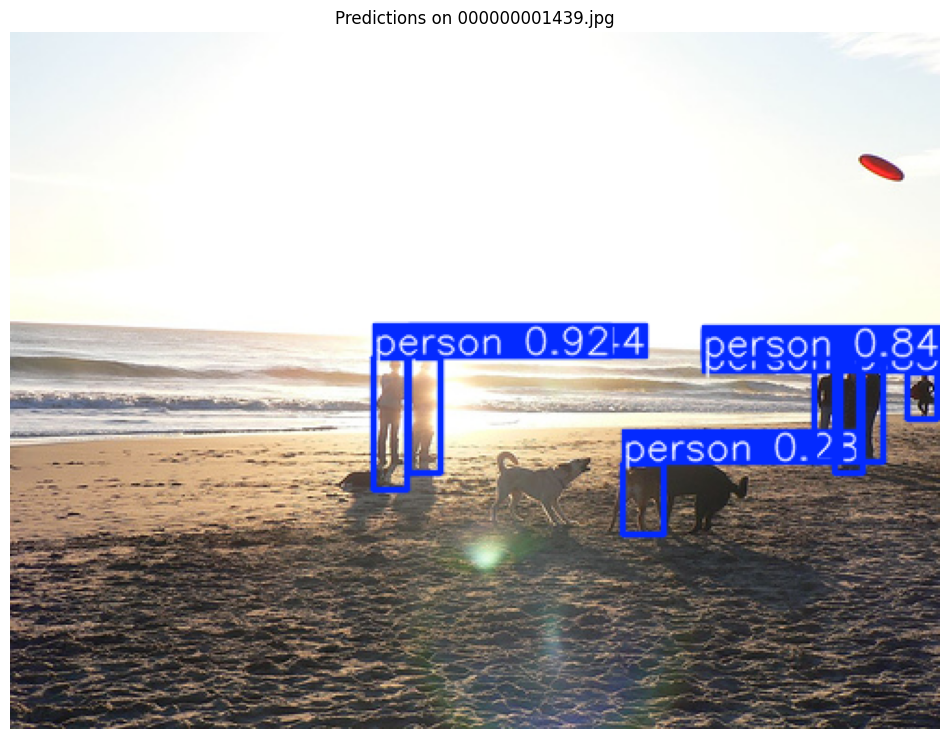


Detections in 000000001439.jpg:
  Class: person, Confidence: 0.92, Bounding Box (x1, y1, x2, y2): [195 175 213 246]
  Class: person, Confidence: 0.84, Bounding Box (x1, y1, x2, y2): [456 176 469 231]
  Class: person, Confidence: 0.83, Bounding Box (x1, y1, x2, y2): [482 183 498 208]
  Class: person, Confidence: 0.78, Bounding Box (x1, y1, x2, y2): [432 177 446 231]
  Class: person, Confidence: 0.67, Bounding Box (x1, y1, x2, y2): [443 178 458 237]
  Class: person, Confidence: 0.44, Bounding Box (x1, y1, x2, y2): [214 175 231 237]
  Class: person, Confidence: 0.28, Bounding Box (x1, y1, x2, y2): [329 232 351 270]

Annotated image(s) saved to: runs/detect/predict4


In [ ]:
import os
from ultralytics import YOLO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Define paths (ensure DRIVE_PATH is correctly defined, as it was in Cell 2)
DRIVE_PATH = "/content/drive/MyDrive/coco2017" # Re-define for safety if running this cell alone
# Path to your best trained model
# Note: The 'yolov9_4_classes_custom_run8' part might change if you re-ran training and it created a new run folder.
# Adjust this path if your run folder has a different number (e.g., run9, run10 etc.)
BEST_MODEL_PATH = os.path.join(DRIVE_PATH, "yolov9_runs", "yolov9_4_classes_custom_run8", "weights", "best.pt")

# --- Select an image for prediction ---
# Option 1: Predict on a single image from your validation set
# We'll automatically pick the first JPG file found in your validation images directory
VAL_IMAGES_DIR = os.path.join(DRIVE_PATH, "validation-300", "data")
sample_image_name = None
for f in os.listdir(VAL_IMAGES_DIR):
    if f.endswith('.jpg'):
        sample_image_name = f
        break

if sample_image_name:
    source_image_path = os.path.join(VAL_IMAGES_DIR, sample_image_name)
    print(f"Attempting to predict on sample image: {source_image_path}")
else:
    print("No sample .jpg image found in validation directory. Please ensure your validation-300/data has images.")
    source_image_path = None # Set to None if no image is found, preventing errors below

# Option 2 (Uncomment to use): Predict on a specific image you upload or have elsewhere
# For example, if you upload an image to Colab's default /content/ directory:
source_image_path = "/content/drive/MyDrive/coco2017/test-30/000000001439.jpg"
# Or if it's already in your Drive somewhere:
 #source_image_path = "/content/drive/MyDrive/coco2017/test-30/000000001380.jpg"

# --- Load Model and Predict ---
if source_image_path and os.path.exists(BEST_MODEL_PATH) and os.path.exists(source_image_path):
    print(f"\nLoading model from: {BEST_MODEL_PATH}")
    model = YOLO(BEST_MODEL_PATH) # Load your trained model

    print(f"\n--- Running Inference on {os.path.basename(source_image_path)} ---")
    # Perform inference
    # 'save=True' will save the annotated image to a 'runs/detect/predict*/' folder in your Colab environment
    # 'conf' is the confidence threshold (objects with lower confidence won't be shown)
    # 'iou' is the Non-Maximum Suppression (NMS) IoU threshold
    results = model.predict(source=source_image_path, save=True, conf=0.25, iou=0.7)

    # Display results (annotated image)
    for r in results:
        im_array = r.plot()  # plot a BGR numpy array of predictions
        im_rgb = im_array[..., ::-1]  # Convert BGR to RGB for matplotlib display
        plt.figure(figsize=(12, 10))
        plt.imshow(im_rgb)
        plt.axis('off')
        plt.title(f"Predictions on {os.path.basename(source_image_path)}")
        plt.show()

        # Print detection details
        if len(r.boxes) > 0:
            print(f"\nDetections in {os.path.basename(source_image_path)}:")
            # model.names is a dictionary mapping class IDs to class names
            # e.g., {0: 'person', 1: 'car', 2: 'dog', 3: 'cake'}
            for box in r.boxes:
                cls_id = int(box.cls[0])
                conf = float(box.conf[0])
                xyxy = box.xyxy[0].cpu().numpy().astype(int) # Bounding box in [x1, y1, x2, y2] format
                class_name = model.names[cls_id]
                print(f"  Class: {class_name}, Confidence: {conf:.2f}, Bounding Box (x1, y1, x2, y2): {xyxy}")
        else:
            print(f"\nNo objects detected in {os.path.basename(source_image_path)} with current confidence/iou thresholds.")

    # The save_dir for inference results is typically a temporary folder in Colab,
    # or inside yolov9_runs if you configured 'project' and 'name' for predict mode.
    # The printed path from 'results[0].save_dir' should be correct.
    print(f"\nAnnotated image(s) saved to: {results[0].save_dir}")

else:
    if not source_image_path:
        print("Prediction skipped: No valid source image path provided or found.")
    if not os.path.exists(BEST_MODEL_PATH):
        print(f"Prediction skipped: Model not found at {BEST_MODEL_PATH}. Please ensure the path is correct.")
    if source_image_path and not os.path.exists(source_image_path):
        print(f"Prediction skipped: Source image not found at {source_image_path}. Please check the image path.")

1

2